In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from collections import Counter

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### Introduction :
Lets start understanding the Seattle Crime datatset first:
1. Different categories of crimes taking place in Seattle City.

In [4]:
input_path = 'Seattle_Police_Department_Police_Report_Incident.csv'
reports = pd.read_csv(input_path)

Processing ALL
Processing BURGLARY-SECURE PARKING-RES
Processing THEFT-SHOPLIFT
Processing THEFT-OTH
Processing VEH-THEFT-TRUCK
Processing BURGLARY-FORCE-RES
Processing VEH-THEFT-AUTO
Processing ROBBERY-BUSINESS-BODYFORCE
Processing BURGLARY-NOFORCE-NONRES
Processing BURGLARY-NOFORCE-RES
Processing PROPERTY DAMAGE-RESIDENTIAL
Processing WEAPON-SURRENDER-EXCLUDING FIR
Processing ASSLT-AGG-GUN
Processing WARRARR-FELONY
Processing THEFT-CARPROWL
Processing ROBBERY-STREET-GUN
Processing HARASSMENT
Processing WARRARR-MISDEMEANOR
Processing PROPERTY DAMAGE-NON RESIDENTIA
Processing THEFT-BUILDING
Processing BURGLARY-FORCE-NONRES
Processing NARC-FOUND-MARIJU
Processing WEAPON-POSSESSION
Processing THEFT-MAIL
Processing THEFT OF SERVICES
Processing HOMICIDE-PREMEDITATED-GUN
Processing PROPERTY LOST
Processing EMBEZZLE
Processing PROPERTY DAMAGE - GRAFFITI
Processing ASSLT-AGG-WEAPON
Processing THEFT-BICYCLE
Processing ROBBERY-STREET-BODYFORCE
Processing THEFT-AUTOACC
Processing TRESPASS
Proces

/anaconda/envs/tf/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/anaconda/envs/tf/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/anaconda/envs/tf/lib/python3.6/site-packages/statsmodels/nonparametric/_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/anaconda/envs/tf/lib/python3.6/site-packages/matplotlib/contour.py:1514: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/anaconda/envs/tf/lib/python3.6/site-packages/matplotlib/contour.py:1515: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Processing THEFT-LICENSE PLATE
Processing ELUDING-FELONY FLIGHT
Processing ROBBERY-BANK-GUN
Processing THEFT-COINOP
Processing ROBBERY-BUSINESS-WEAPON
Processing FRAUD-CHECK
Processing NARC-POSSESS-HEROIN
Processing THEFT-PKPOCKET
Processing FRAUD-IDENTITY THEFT
Processing THREATS-OTHER
Processing DISTURBANCE-OTH
Processing VIOL-COURT ORDER
Processing FRAUD-CREDIT CARD
Processing NARC-SELL-HEROIN
Processing THEFT-AUTO PARTS
Processing THREATS-WEAPON
Processing THEFT-PRSNATCH
Processing ASSLT-AGG-POLICE-BODYFORCE
Processing FRAUD-OTHER
Processing ASSLT-AGG-POLICE-WEAPON
Processing DISPUTE-OTH
Processing FORGERY-OTH
Processing ILLEGAL DUMPING
Processing DISPUTE-CIVIL PROPERTY (NON AU
Processing TRAFFIC
Processing NARC-POSSESS-HALLUCINOGEN
Processing THEFT-BOAT
Processing LOITERING
Processing WEAPON-UNLAWFUL USE
Processing ANIMAL-BITE
Processing VEH-THEFT-MTRCYCLE
Processing NARC-DRUG TRAFFIC LOITERING
Processing NARC-SELL-PILL/TABLET
Processing PROPERTY STOLEN-SELL
Processing FRAUD-COMPU

/anaconda/envs/tf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda/envs/tf/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda/envs/tf/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Processing ENDANGER
Processing ROBBERY-OTHER
Processing ROBBERY-BANK-OTHER
Processing BURGLARY-OTHER
Processing THEFT-UNLAWFUL ISSUANCE OF BAN
Processing ASSLT-OTHER
Processing NARC-SMUGGLE-COCAINE
Processing SOAP-VIOL - ZONE 1
Processing GAMBLE-OPERATE
Processing SOAP-VIOL - ZONE 6
Processing SOAP-VIOL - ZONE 2
Processing SOAP-VIOL - ZONE 3
Processing NARC-SMUGGLE-OTHER
Processing HOMICIDE-NEG-MANS-BODYFORCE


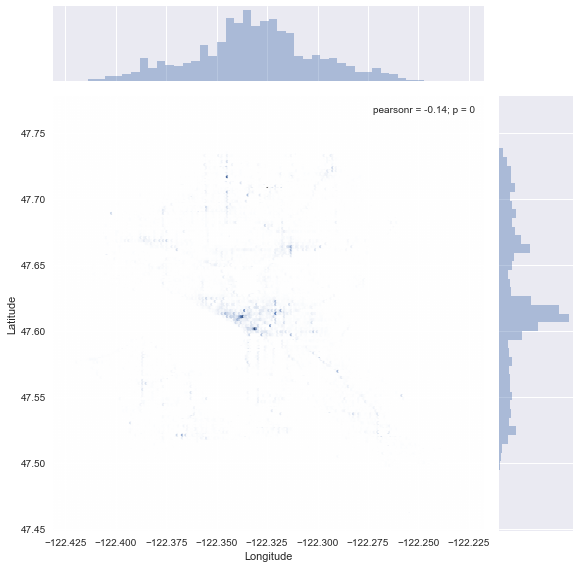

In [9]:
print("Processing ALL");
# This has to be hex to prevent the kernel from timing out, kde is just too slow with that much data.
all_plot = sb.jointplot(x="Longitude", y="Latitude", data=reports, kind="hex", size=8);

for offense_type in reports["Offense Type"].unique():
    print("Processing " + offense_type);
    data = reports[reports["Offense Type"] == offense_type];
    if len(data) > 2:
        plot = sb.jointplot("Longitude", "Latitude", data=data, kind="kde", size=8, xlim=all_plot.ax_joint.get_xlim(), ylim=all_plot.ax_joint.get_ylim());
        plt.subplots_adjust(top=0.93);
        plot.fig.suptitle(offense_type);
        plot.savefig(offense_type.replace("/", "-").replace(" ", "").replace(",", "").replace("[", "").replace("]", "")  + ".png");
        plot.fig.clf();
        plt.close();

In [14]:
from datetime import datetime as dt
reports['Date Reported'] = pd.to_datetime(reports['Date Reported'])
reports['Date Reported'][:10]

0   2013-03-07 16:29:00
1   2012-05-26 20:20:00
2   2012-06-24 17:29:00
3   2014-03-08 06:57:00
4   2014-04-08 15:59:00
5   2013-03-07 11:59:00
6   2014-04-23 08:29:00
7   2014-04-24 06:30:00
8   2014-04-19 23:37:00
9   2014-04-22 06:12:00
Name: Date Reported, dtype: datetime64[ns]

In [17]:
reports['Year'] = reports["Date Reported"].dt.year
reports['Year'][:2]

0    2013
1    2012
Name: Year, dtype: int64

In [19]:
reports['Month'] = reports["Date Reported"].dt.month
reports['Month'][:10]

0    3
1    5
2    6
3    3
4    4
5    3
6    4
7    4
8    4
9    4
Name: Month, dtype: int64

In [20]:
reports['Day of Month'] = reports["Date Reported"].dt.day
reports['Day of Month'][:10]

0     7
1    26
2    24
3     8
4     8
5     7
6    23
7    24
8    19
9    22
Name: Day of Month, dtype: int64

In [21]:
reports['Hour'] = reports["Date Reported"].dt.hour
reports['Hour'][:10]

0    16
1    20
2    17
3     6
4    15
5    11
6     8
7     6
8    23
9     6
Name: Hour, dtype: int64

In [23]:
reports['Day of Week'] = reports["Date Reported"].dt.dayofweek
reports['Day of Week'][:10]

0    3
1    5
2    6
3    5
4    1
5    3
6    2
7    3
8    5
9    1
Name: Day of Week, dtype: int64

In [24]:
reports['Weekday name'] = reports["Date Reported"].dt.weekday_name
reports['Weekday name'][:10]

0     Thursday
1     Saturday
2       Sunday
3     Saturday
4      Tuesday
5     Thursday
6    Wednesday
7     Thursday
8     Saturday
9      Tuesday
Name: Weekday name, dtype: object

In [26]:
def isWeekday(day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday']:
        return True
    elif day in ['Friday', 'Saturday', 'Sunday']:
        return False
    else:
        return None

reports['Is Weekday'] = reports['Weekday name'].apply(lambda x : isWeekday(x))
reports['Is Weekday'][:10]

0     True
1    False
2    False
3    False
4     True
5     True
6     True
7     True
8    False
9     True
Name: Is Weekday, dtype: bool

Tasks -
1. Make following additional fields from "Date Reported":-
    1. Year
    2. Month
    3. Day of Month
    4. Hour
    5. Day of Week
    6. Weekday name
    7. Is Weekday

In [37]:
# reports = reports.drop('General Offense Number', axis=1)
# reports = reports.drop('Date', axis=1)
reports.columns

Index(['RMS CDW ID', 'Offense Code', 'Offense Code Extension', 'Offense Type',
       'Summary Offense Code', 'Summarized Offense Description',
       'Date Reported', 'Occurred Date or Date Range Start',
       'Occurred Date Range End', 'Hundred Block Location', 'District/Sector',
       'Zone/Beat', 'Census Tract 2000', 'Longitude', 'Latitude', 'Location',
       'Month', 'Year', 'Day of Month', 'Hour', 'Day of Week', 'Weekday name',
       'Is Weekday'],
      dtype='object')

In [41]:
reports.head()

,Offense Type,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year,Day of Month,Hour,Day of Week,Weekday name,Is Weekday
0,BURGLARY-SECURE PARKING-RES,BURGLARY-SECURE PARKING-RES,2013-03-07 16:29:00,03/07/2013 04:29:00 PM,NaN,60XX BLOCK OF PHINNEY AV N,B,B2,3500.2037,-122.354378,47.672829,"(47.672828674, -122.354377747)",3,2013,7,16,3,Thursday,True
1,THEFT-SHOPLIFT,SHOPLIFTING,2012-05-26 20:20:00,05/26/2012 08:20:00 PM,NaN,1XX BLOCK OF MERCER ST,Q,Q3,7000.3021,-122.354752,47.624577,"(47.624576569, -122.354751587)",5,2012,26,20,5,Saturday,False
2,THEFT-OTH,OTHER PROPERTY,2012-06-24 17:29:00,06/24/2012 03:30:00 PM,NaN,3XX BLOCK OF HARRISON ST,Q,Q3,7100.2001,-122.350853,47.622086,"(47.622085571, -122.350852966)",6,2012,24,17,6,Sunday,False
3,VEH-THEFT-TRUCK,VEHICLE THEFT,2014-03-08 06:57:00,03/07/2014 10:00:00 PM,03/08/2014 06:30:00 AM,CHERRY ST / 2 AV,K,K1,8100.2036,-122.333176,47.603016,"(47.6030159, -122.333175659)",3,2014,8,6,5,Saturday,False
4,BURGLARY-FORCE-RES,BURGLARY,2014-04-08 15:59:00,04/08/2014 10:30:00 AM,04/08/2014 03:59:00 PM,130XX BLOCK OF 25 AV NE,L,L1,200.2001,-122.301888,47.723846,"(47.723846436, -122.301887512)",4,2014,8,15,1,Tuesday,True


In [40]:
invalidColumns = ['RMS CDW ID', 'Offense Code', 'Offense Code Extension', 'Summary Offense Code']
for col in invalidColumns:
    reports = reports.drop(col, axis=1)

In [39]:
reports.to_csv('Curated Seattle Data.csv')

In [40]:
reports = pd.read_csv('Curated Seattle Data.csv')

### Visualization using Plots :
1. Histogram showing crimes in these years


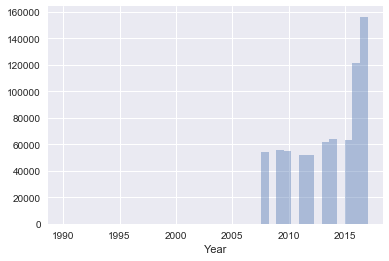

In [41]:
sb.distplot(reports['Year'], bins = 40, kde=False)

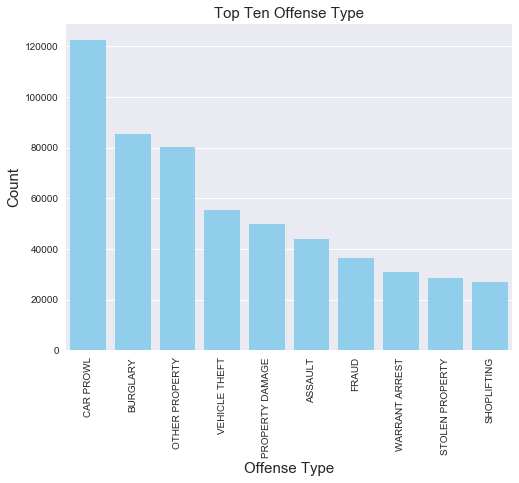

In [42]:
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

# sb.countplot(data=reports, x= 'Year', hue='Offense Type', ax=ax1)

offense_type = Counter(reports['Summarized Offense Description'].dropna().tolist()).most_common(10)
offense_type_indexs = [offense[0] for offense in offense_type]
offense_type_values = [offense[1] for offense in offense_type]

fig,ax = plt.subplots(figsize=(8,6))
sb.barplot(x = offense_type_indexs,y = offense_type_values,color='#81d4fa',ax=ax)
plt.title('Top Ten Offense Type',fontsize=15)
plt.xlabel('Offense Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=90)

In [43]:
def isCarProwl(x):
    if x == 'CAR PROWL':
        return True
    else:
        return False
    
    

rec_carProwl = pd.DataFrame()
rec_carProwl = reports[reports['Summarized Offense Description'].apply(lambda x: isCarProwl(x) == True)]

In [44]:
rec_carProwl

,Unnamed: 0,Unnamed: 0.1,Offense Type,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,...,Longitude,Latitude,Location,Month,Year,Day of Month,Hour,Day of Week,Weekday name,Is Weekday
21,21,21,THEFT-CARPROWL,CAR PROWL,2014-08-20 13:35:00,07/19/2014 02:00:00 PM,07/19/2014 04:00:00 PM,11XX BLOCK OF WESTERN AV,K,K1,...,-122.338325,47.605301,"(47.605300903, -122.3383255)",8,2014,20,13,2,Wednesday,True
28,28,28,THEFT-CARPROWL,CAR PROWL,2013-03-07 07:44:00,03/06/2013 08:30:00 PM,03/07/2013 07:10:00 AM,1XX BLOCK OF LEE ST,Q,Q2,...,-122.353935,47.630997,"(47.630996704, -122.353935242)",3,2013,7,7,3,Thursday,True
35,35,35,THEFT-CARPROWL,CAR PROWL,2013-03-07 09:45:00,03/05/2013 05:00:00 PM,03/06/2013 03:00:00 PM,52XX BLOCK OF S MAYFLOWER ST,R,R3,...,-122.266991,47.554100,"(47.554100037, -122.266990662)",3,2013,7,9,3,Thursday,True
36,36,36,THEFT-CARPROWL,CAR PROWL,2015-08-24 08:00:00,08/23/2015 09:15:00 AM,08/23/2015 09:59:00 AM,XX BLOCK OF LENORA ST,D,D1,...,-122.344986,47.611004,"(47.611003876, -122.344985962)",8,2015,24,8,0,Monday,True
43,43,43,THEFT-CARPROWL,CAR PROWL,2013-03-07 09:12:00,03/07/2013 06:00:00 AM,03/07/2013 09:00:00 AM,NE 145 ST / 15 AV NE,L,L1,...,-122.312752,47.733948,"(47.733947754, -122.31275177)",3,2013,7,9,3,Thursday,True
44,44,44,THEFT-CARPROWL,CAR PROWL,2013-03-07 11:14:00,03/06/2013 10:00:00 PM,03/07/2013 09:00:00 AM,16XX BLOCK OF BOYLSTON AV,E,E2,...,-122.323425,47.615799,"(47.61579895, -122.323425293)",3,2013,7,11,3,Thursday,True
64,64,64,THEFT-CARPROWL,CAR PROWL,2013-03-07 14:05:00,03/07/2013 10:00:00 AM,03/07/2013 01:00:00 PM,3XX BLOCK OF 1 AV S,K,K2,...,-122.334183,47.599625,"(47.599624634, -122.334182739)",3,2013,7,14,3,Thursday,True
65,65,65,THEFT-CARPROWL,CAR PROWL,2016-07-10 17:47:00,07/10/2016 05:47:00 PM,NaN,10XX BLOCK OF S JACKSON ST,G,G1,...,-122.318428,47.599186,"(47.599185944, -122.31842804)",7,2016,10,17,6,Sunday,False
66,66,66,THEFT-CARPROWL,CAR PROWL,2016-07-26 05:55:00,07/26/2016 05:55:00 AM,NaN,EVANSTON AV N / N 117 ST,N,N1,...,-122.351555,47.714149,"(47.714149475, -122.351554871)",7,2016,26,5,1,Tuesday,True
68,68,68,THEFT-CARPROWL,CAR PROWL,2016-07-12 19:43:00,07/12/2016 06:07:00 PM,NaN,10XX BLOCK OF S JACKSON ST,G,G1,...,-122.318428,47.599186,"(47.599185944, -122.31842804)",7,2016,12,19,1,Tuesday,True


In [36]:
import operator
import string
def plot_top_crimes(df, column, title, fname, items=0):
    """
    Helper function for plotting seaborn plots
    """
    lower_case     = operator.methodcaller('lower')
    df.columns     = df.columns.map(lower_case)
    by_col         = df.groupby(column)
    col_freq       = by_col.size()
    col_freq.index = col_freq.index.map(string.capwords)

#     col_freq.sort(ascending=True, inplace=True)
    (x = offense_type_indexs,y = offense_type_values,color='#81d4fa',ax=ax)
    sb.barplot(col_freq[slice(-1, - items, -1)], title, fname)

In [37]:
offense_type = Counter(reports['Summarized Offense Description'].dropna().tolist()).most_common(10)
offense_type_indexs = [offense[0] for offense in offense_type]
offense_type_values = [offense[1] for offense in offense_type]

fig,ax = plt.subplots(figsize=(8,6))
sb.barplot(x = offense_type_indexs,y = offense_type_values,color='#81d4fa',ax=ax)
plt.title('Top Ten Offense Type',fontsize=15)
plt.xlabel('Offense Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=90)

Index(['unnamed: 0', 'offense type', 'summarized offense description',
       'date reported', 'occurred date or date range start',
       'occurred date range end', 'hundred block location', 'district/sector',
       'zone/beat', 'census tract 2000', 'longitude', 'latitude', 'location',
       'month', 'year', 'day of month', 'hour', 'day of week', 'weekday name',
       'is weekday'],
      dtype='object')

In [38]:
plot_top_crimes(rec_carProwl, 'hundred block location',    'Top Crime Locations',         'location.png', items=20)

ValueError: Could not interpret input 'Top Crime Locations'

## Variation with hour, day of week and month

Plots below show trends in crime for 3 main date factors, 

- Day of week: Crime rates change during the week. Crime incidents are higher on Friday, and lowest on Sundays
- Month: Crime rate is highest during october, and lowest in december. Crime seems to follow a bimodal pattern with peaks in May and October and valleys in December and August. 
- Hour: Crime vs Hour of day shows a gruadual reduction in crime from midnight to 5 am, after which it rises from 5 am to 10 am, and remains at sustained high level until midnight. 

## Seasonal patterns in crimes
I also noticed seasonal patterns in data, where although the total crime counts were different, the normalized values followed similar trends. 
When normalized by mean and standard deviations seasonal patterns in month appear. 

In [50]:
from sklearn.ensemble import RandomForestClassifier
import copy

In [52]:
cpy_reports.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Offense Type',
       'Summarized Offense Description', 'Date Reported',
       'Occurred Date or Date Range Start', 'Occurred Date Range End',
       'Hundred Block Location', 'District/Sector', 'Zone/Beat',
       'Census Tract 2000', 'Longitude', 'Latitude', 'Location', 'Month',
       'Year', 'Day of Month', 'Hour', 'Day of Week', 'Weekday name',
       'Is Weekday'],
      dtype='object')

In [51]:
cpy_reports = copy.deepcopy(reports)

In [58]:
# invalidColumns = ['Summarized Offense Description', 'Date Reported', 'Occurred Date or Date Range Start', 'Occurred Date Range End', 'Hundred Block Location', 'District/Sector', 'Zone/Beat', 'Census Tract 2000']
invalidColumns = ['Location']
for col in invalidColumns:
    cpy_reports = cpy_reports.drop(col, axis=1)

In [59]:
cpy_reports

,Unnamed: 0,Unnamed: 0.1,Offense Type,Longitude,Latitude,Month,Year,Day of Month,Hour,Day of Week,Weekday name,Is Weekday
0,0,0,BURGLARY-SECURE PARKING-RES,-122.354378,47.672829,3,2013,7,16,3,Thursday,True
1,1,1,THEFT-SHOPLIFT,-122.354752,47.624577,5,2012,26,20,5,Saturday,False
2,2,2,THEFT-OTH,-122.350853,47.622086,6,2012,24,17,6,Sunday,False
3,3,3,VEH-THEFT-TRUCK,-122.333176,47.603016,3,2014,8,6,5,Saturday,False
4,4,4,BURGLARY-FORCE-RES,-122.301888,47.723846,4,2014,8,15,1,Tuesday,True
5,5,5,BURGLARY-SECURE PARKING-RES,-122.345009,47.619144,3,2013,7,11,3,Thursday,True
6,6,6,VEH-THEFT-AUTO,-122.386162,47.675289,4,2014,23,8,2,Wednesday,True
7,7,7,VEH-THEFT-AUTO,-122.377853,47.682281,4,2014,24,6,3,Thursday,True
8,8,8,ROBBERY-BUSINESS-BODYFORCE,-122.334251,47.618183,4,2014,19,23,5,Saturday,False
9,9,9,VEH-THEFT-AUTO,-122.331932,47.705929,4,2014,22,6,1,Tuesday,True


In [56]:
import tensorflow

In [90]:
offense_type = Counter(cpy_reports['Offense Type'].dropna().tolist()).most_common(20)

In [92]:
offense_type_indexs = [offense[0] for offense in offense_type]
offense_type_indexs

['THEFT-CARPROWL',
 'VEH-THEFT-AUTO',
 'THEFT-OTH',
 'BURGLARY-FORCE-RES',
 'PROPERTY DAMAGE-NON RESIDENTIA',
 'THEFT-SHOPLIFT',
 'ASSLT-NONAGG',
 'PROPERTY FOUND',
 'DISTURBANCE-OTH',
 'BURGLARY-NOFORCE-RES',
 'THEFT-BUILDING',
 'BURGLARY-FORCE-NONRES',
 'WARRARR-FELONY',
 'TRESPASS',
 'WARRARR-MISDEMEANOR',
 'FRAUD-CREDIT CARD',
 'FRAUD-IDENTITY THEFT',
 'BURGLARY-SECURE PARKING-RES',
 'THEFT-BICYCLE',
 'ASSLT-AGG-WEAPON']

In [93]:
filtered_data_top20 = cpy_reports[cpy_reports['Offense Type'].isin(offense_type_indexs)]

In [94]:
filtered_data_top20.

,Unnamed: 0,Unnamed: 0.1,Offense Type,Longitude,Latitude,Month,Year,Day of Month,Hour,Day of Week,Weekday name,Is Weekday
0,0,0,BURGLARY-SECURE PARKING-RES,-122.354378,47.672829,3,2013,7,16,3,Thursday,True
1,1,1,THEFT-SHOPLIFT,-122.354752,47.624577,5,2012,26,20,5,Saturday,False
2,2,2,THEFT-OTH,-122.350853,47.622086,6,2012,24,17,6,Sunday,False
4,4,4,BURGLARY-FORCE-RES,-122.301888,47.723846,4,2014,8,15,1,Tuesday,True
5,5,5,BURGLARY-SECURE PARKING-RES,-122.345009,47.619144,3,2013,7,11,3,Thursday,True
6,6,6,VEH-THEFT-AUTO,-122.386162,47.675289,4,2014,23,8,2,Wednesday,True
7,7,7,VEH-THEFT-AUTO,-122.377853,47.682281,4,2014,24,6,3,Thursday,True
9,9,9,VEH-THEFT-AUTO,-122.331932,47.705929,4,2014,22,6,1,Tuesday,True
11,11,11,BURGLARY-NOFORCE-RES,-122.289543,47.625561,3,2013,7,19,3,Thursday,True
16,16,16,THEFT-OTH,-122.318550,47.711529,8,2014,21,18,3,Thursday,True


In [ ]:
offense_type_indexs = [offense[0] for offense in offense_type]

In [96]:
cpy_reports['Offense Type'].h

0    BURGLARY-SECURE PARKING-RES
1                 THEFT-SHOPLIFT
2                      THEFT-OTH
3                VEH-THEFT-TRUCK
4             BURGLARY-FORCE-RES
Name: Offense Type, dtype: object

In [101]:
filtered_data_top20.shape[0]

537072

In [102]:
filtered_data_top20.to_csv('Filtered data.csv')

In [ ]:
def dropOffenseType(x):
    if x in 

In [63]:
for col in invalidColumns:
    cpy_reports = cpy_reports.drop(col, axis=1)

122646

In [124]:
top20_offenseTypeMap = {'THEFT-CARPROWL':1,
 'VEH-THEFT-AUTO':2,
 'THEFT-OTH':3,
 'BURGLARY-FORCE-RES':4,
 'PROPERTY DAMAGE-NON RESIDENTIA':5,
 'THEFT-SHOPLIFT':6,
 'ASSLT-NONAGG':7,
 'PROPERTY FOUND':8,
 'DISTURBANCE-OTH':9,
 'BURGLARY-NOFORCE-RES':10,
 'THEFT-BUILDING':11,
 'BURGLARY-FORCE-NONRES':12,
 'WARRARR-FELONY':13,
 'TRESPASS':14,
 'WARRARR-MISDEMEANOR':15,
 'FRAUD-CREDIT CARD':16,
 'FRAUD-IDENTITY THEFT':17,
 'BURGLARY-SECURE PARKING-RES':18,
 'THEFT-BICYCLE':19,
 'ASSLT-AGG-WEAPON':20,
                        True: 1,
                       False: 0,
                        'Morning': 1,
                        'Afternoon': 2,
                        'Evening':3
                       }

In [125]:
top20_offenseTypeMap

{'THEFT-CARPROWL': 1,
 'VEH-THEFT-AUTO': 2,
 'THEFT-OTH': 3,
 'BURGLARY-FORCE-RES': 4,
 'PROPERTY DAMAGE-NON RESIDENTIA': 5,
 'THEFT-SHOPLIFT': 6,
 'ASSLT-NONAGG': 7,
 'PROPERTY FOUND': 8,
 'DISTURBANCE-OTH': 9,
 'BURGLARY-NOFORCE-RES': 10,
 'THEFT-BUILDING': 11,
 'BURGLARY-FORCE-NONRES': 12,
 'WARRARR-FELONY': 13,
 'TRESPASS': 14,
 'WARRARR-MISDEMEANOR': 15,
 'FRAUD-CREDIT CARD': 16,
 'FRAUD-IDENTITY THEFT': 17,
 'BURGLARY-SECURE PARKING-RES': 18,
 'THEFT-BICYCLE': 19,
 'ASSLT-AGG-WEAPON': 20,
 True: 1,
 False: 0,
 'Morning': 1,
 'Afternoon': 2,
 'Evening': 3}

In [121]:
def returnTimeOfDay(x):
    if x in [6, 7, 8, 9, 10, 11,12]:
        return 'Morning'
    elif x in [13, 14, 15, 16, 17, 18, 19, 20]:
        return 'Afternoon'
    else:
        return 'Evening'
        

In [122]:
filtered_data_top20['Time of Day'] = filtered_data_top20['Hour'].apply(lambda x: returnTimeOfDay(x))

In [ ]:
filtered_data_top20 = filtered_data_top20.applymap(lambda x: 1 if x is True else 0)

In [126]:
filtered_data_top20 = filtered_data_top20.applymap(lambda x: top20_offenseTypeMap.get(x) if x in top20_offenseTypeMap else x)   

In [127]:
filtered_data_top20

,Unnamed: 0,Unnamed: 0.1,Offense Type,Longitude,Latitude,Month,Year,Day of Month,Hour,Day of Week,Weekday name,Is Weekday,Time of Day
0,0,0,18,-122.354378,47.672829,3,2013,7,16,3,Thursday,1,2
1,1,1,6,-122.354752,47.624577,5,2012,26,20,5,Saturday,0,2
2,2,2,3,-122.350853,47.622086,6,2012,24,17,6,Sunday,0,2
4,4,4,4,-122.301888,47.723846,4,2014,8,15,1,Tuesday,1,2
5,5,5,18,-122.345009,47.619144,3,2013,7,11,3,Thursday,1,1
6,6,6,2,-122.386162,47.675289,4,2014,23,8,2,Wednesday,1,1
7,7,7,2,-122.377853,47.682281,4,2014,24,6,3,Thursday,1,1
9,9,9,2,-122.331932,47.705929,4,2014,22,6,1,Tuesday,1,1
11,11,11,10,-122.289543,47.625561,3,2013,7,19,3,Thursday,1,2
16,16,16,3,-122.318550,47.711529,8,2014,21,18,3,Thursday,1,2


In [128]:
invalidColumns = ['Year', 'Weekday name', 'Hour']
for col in invalidColumns:
    filtered_data_top20 = filtered_data_top20.drop(col, axis=1)

In [129]:
filtered_data_top20

,Unnamed: 0,Unnamed: 0.1,Offense Type,Longitude,Latitude,Month,Day of Month,Day of Week,Is Weekday,Time of Day
0,0,0,18,-122.354378,47.672829,3,7,3,1,2
1,1,1,6,-122.354752,47.624577,5,26,5,0,2
2,2,2,3,-122.350853,47.622086,6,24,6,0,2
4,4,4,4,-122.301888,47.723846,4,8,1,1,2
5,5,5,18,-122.345009,47.619144,3,7,3,1,1
6,6,6,2,-122.386162,47.675289,4,23,2,1,1
7,7,7,2,-122.377853,47.682281,4,24,3,1,1
9,9,9,2,-122.331932,47.705929,4,22,1,1,1
11,11,11,10,-122.289543,47.625561,3,7,3,1,2
16,16,16,3,-122.318550,47.711529,8,21,3,1,2


In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier

In [138]:
x, y = filtered_data_top20.drop('Offense Type', axis=1), filtered_data_top20['Offense Type']
# data_scalar = StandardScaler()
# x = data_scalar.fit_transform(x)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2, random_state=42)

In [140]:
X_train.shape[0]

429657

### Apply K-nearest neighbour 

In [143]:
X_test.shape[0]

107415

In [145]:
data = [X_train, y_train, X_test, y_test]

In [149]:
# # k-means 
# def train(data):
#     x = data[0]
#     y = data[1]
#     m = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='manhattan', n_jobs=-1)
#     m.fit(x, y)
#     print('Training successful\n')
#     return m

In [154]:
from sklearn import mixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [237]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [229]:
def randomForest_train(data):
    x = data[0]
    y = data[1]
    clf = RandomForestClassifier(max_depth=10, n_estimators=50)
    clf.fit(x, y)
    print(clf.feature_importances_)
    print('Training successful  new\n')
    return clf

In [240]:
def adaboost_train(data):
    x = data[0]
    y = data[1]
    clf = AdaBoostClassifier(n_estimators=500)
    clf.fit(x, y)
    print(clf.feature_importances_)
    print('Training successful  new\n')
    return clf

In [268]:
def kNN_train(data):
    x = data[0]
    y = data[1]
    clf = KNeighborsClassifier(n_neighbors=20)
    clf.fit(x, y)
#     print(clf.feature_importances_)
    print('Training successful  new\n')
    return clf

In [241]:
model_ab = adaboost_train(data)
def predict_ab(model, dtest):
    x_test, y_test = dtest[2], dtest[3]
    pred_y = model.predict_proba(x_test)
    return pred_y
pred_y = predict_ab(model_ab, data)
pred_y

[ 0.204  0.222  0.252  0.28   0.016  0.01   0.008  0.     0.008]
Training successful  new



array([[ 0.05019212,  0.05012999,  0.05008649, ...,  0.05003938,
         0.05006462,  0.04984145],
       [ 0.05034023,  0.0502547 ,  0.050238  , ...,  0.0471317 ,
         0.05001877,  0.04999147],
       [ 0.05014294,  0.04997738,  0.05008148, ...,  0.04990458,
         0.04997091,  0.04998689],
       ..., 
       [ 0.05033672,  0.05017772,  0.05026525, ...,  0.04691619,
         0.04992885,  0.05008365],
       [ 0.05016098,  0.05015315,  0.05008087, ...,  0.04986666,
         0.0499621 ,  0.0498548 ],
       [ 0.05019448,  0.0500748 ,  0.05004947, ...,  0.04988686,
         0.04996487,  0.05000035]])

In [269]:
model_kn = kNN_train(data)
def predict_kn(model, dtest):
    x_test, y_test = dtest[2], dtest[3]
    pred_y = model.predict_proba(x_test)
    return pred_y
pred_y = predict_kn(model_kn, data)
pred_y

Training successful  new



array([[ 0.25,  0.  ,  0.1 , ...,  0.  ,  0.05,  0.  ],
       [ 0.35,  0.1 ,  0.05, ...,  0.  ,  0.  ,  0.  ],
       [ 0.2 ,  0.  ,  0.05, ...,  0.  ,  0.2 ,  0.  ],
       ..., 
       [ 0.35,  0.  ,  0.05, ...,  0.  ,  0.  ,  0.  ],
       [ 0.2 ,  0.1 ,  0.15, ...,  0.  ,  0.  ,  0.  ],
       [ 0.05,  0.  ,  0.05, ...,  0.05,  0.  ,  0.  ]])

In [ ]:
# X, y = make_classification(n_samples=1000, n_features=4,
# ...                            n_informative=2, n_redundant=0,
# ...                            random_state=0, shuffle=False)
# >>> clf = RandomForestClassifier(max_depth=2, random_state=0)
# >>> clf.fit(X, y)
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=2, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
#             oob_score=False, random_state=0, verbose=0, warm_start=False)
# >>> print(clf.feature_importances_)
# [ 0.17287856  0.80608704  0.01884792  0.00218648]
# >>> print(clf.predict([[0, 0, 0, 0]]))
# [1]

In [150]:
# model = train(data)

Training successful



In [270]:
model_rf = randomForest_train(data)

[ 0.09636057  0.10403025  0.28521586  0.31935671  0.03229864  0.03038153
  0.02440978  0.00475284  0.1031938 ]
Training successful  new



In [231]:
def predict_rf(model, dtest):
    x_test, y_test = dtest[2], dtest[3]
    pred_y = model.predict_proba(x_test)
    return pred_y
#     auc = sklearn.metrics.roc_auc_score(y_test, pred_y)
#     print("knn AUC: ", auc)
#     return auc

In [232]:
pred_y = predict_rf(model_rf, data)
pred_y
# auc_p.append(auc)

array([[ 0.28509243,  0.10378528,  0.0813319 , ...,  0.0326787 ,
         0.03587061,  0.00969466],
       [ 0.24860062,  0.10201424,  0.09083011, ...,  0.00455539,
         0.01696664,  0.00804188],
       [ 0.2239375 ,  0.03968491,  0.07191737, ...,  0.01162076,
         0.02543553,  0.03246077],
       ..., 
       [ 0.18269259,  0.05826522,  0.10097648, ...,  0.00152081,
         0.01886419,  0.01100795],
       [ 0.1355907 ,  0.09792064,  0.07842244, ...,  0.02330805,
         0.02093739,  0.01259049],
       [ 0.1634273 ,  0.06778162,  0.05643381, ...,  0.02320172,
         0.01938881,  0.0365436 ]])

In [265]:
pred_y.shape

(107415, 20)

In [271]:
correct = 0
truth_y = data[3]
for i in range(pred_y.shape[0]):
    output_pred = sorted( zip(model_rf.classes_, pred_y[i]), key=lambda x:x[1], reverse=True )[:5]
    dic_res = dict(output_pred)
#     print(truth_y.iloc[0])
    if truth_y.iloc[0] in dic_res.keys():
        correct += 1

In [272]:
correct

45747

In [244]:
correct/pred_y.shape[0]

0.40708467160080064

In [202]:
truth_y.iloc[0]

4

In [188]:
output_pred = sorted( zip(model_rf.classes_, pred_y), key=lambda x:x[1], reverse=True )[:5]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [183]:
res = [a[0] for a in output_pred]

In [185]:
dic_res = dict(output_pred)

In [186]:
dic_res

{1: 0.26779516299085843,
 3: 0.07597585162831251,
 8: 0.15788868794416988,
 17: 0.30731158664525471,
 19: 0.15883887311490255}

In [160]:
pred_y.shape

(107415, 20)

In [152]:
def predict(model, dtest):
    x_test, y_test = dtest[2], dtest[3]
    pred_1m = model.predict_proba(x_test)
    pred_1m = pred_1m[:,1]
    # pred_10m = np.reshape(pred_1m, (n_test_examples, n_timesteps))
    # pred_10m = np.mean(pred_10m, axis=1)
    pred_list = zip(y_test, pred_1m)
    auc = sklearn.metrics.roc_auc_score(y_test, pred_1m)
    print("knn AUC: ", auc)
    return auc

In [ ]:
>>> import numpy as np
>>> from sklearn import mixture
>>> np.random.seed(1)
>>> g = mixture.GMM(n_components=2)
>>> # Generate random observations with two modes centered on 0
>>> # and 10 to use for training.
>>> obs = np.concatenate((np.random.randn(100, 1),
...                       10 + np.random.randn(300, 1)))
>>> g.fit(obs) 
GMM(covariance_type=None, min_covar=0.001, n_components=2,
        random_state=None, thresh=0.01)
>>> np.round(g.weights_, 2)
array([ 0.75,  0.25])
>>> np.round(g.means_, 2)
array([[ 10.05],
       [  0.06]])
>>> np.round(g.covars_, 2) 
array([[[ 1.02]],
       [[ 0.96]]])
>>> g.predict([[0], [2], [9], [10]])
array([1, 1, 0, 0])
>>> np.round(g.score([[0], [2], [9], [10]]), 2)
array([-2.19, -4.58, -1.75, -1.21])
>>> # Refit the model on new data (initial parameters remain the
>>> # same), this time with an even split between the two modes.
>>> g.fit(20 * [[0]] +  20 * [[10]]) 
GMM(covariance_type=None, min_covar=0.001, n_components=2,
        random_state=None, thresh=0.01)
>>> np.round(g.weights_, 2)
array([ 0.5,  0.5])